<a href="https://colab.research.google.com/github/drsubirghosh2008/drsubirghosh2008/blob/main/PW_Assignment_Module_26_8_11_24_Boosting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. What is Gradient Boosting Regression?

Answer:

Gradient Boosting Regression is a machine learning technique used for regression tasks. It builds an ensemble of decision trees in a sequential manner to predict a continuous target variable. The core idea is to improve the model's performance by iteratively reducing the residual errors (differences between predicted and actual values) from the previous model.

Here’s how it works:

Key Concepts:

Base Learner:

Gradient Boosting typically uses decision trees (often shallow) as base learners.

These are weak models with limited predictive power.

Sequential Learning:

Models are built one at a time, and each new model focuses on correcting the errors of the previous model.
Gradient Descent:

It minimizes a loss function (e.g., Mean Squared Error for regression) by fitting the next model to the negative gradient of the loss with respect to the predictions.
This ensures that the new model moves predictions closer to the actual values.
Ensemble Method:

The final prediction is the weighted sum of all the weak learners.
Typically, predictions are aggregated by summing up their contributions.
Shrinkage (Learning Rate):

A learning rate parameter is introduced to control the contribution of each weak learner.
This reduces overfitting and allows for better generalization.
Regularization:

To prevent overfitting, techniques like limiting tree depth, setting minimum samples per leaf, or using subsampling are employed.
Steps in Gradient Boosting Regression:
Initialize the model with a constant value, often the mean of the target variable.
Compute the residuals (errors) between predicted and actual values.
Fit a weak learner (decision tree) to these residuals.
Update the model by adding the weak learner’s predictions, scaled by the learning rate.
Repeat steps 2–4 for a predefined number of iterations or until the residuals are minimized sufficiently.
Combine all the weak learners to form the final model.
Advantages:
Handles both linear and nonlinear relationships effectively.
Robust to overfitting if properly regularized.
Offers excellent predictive performance on a wide range of datasets.
Disadvantages:
Computationally intensive due to its iterative nature.
Hyperparameters like the number of trees, learning rate, and tree depth need careful tuning.
Sensitive to noisy data and outliers.
Libraries and Implementations:
Scikit-learn: GradientBoostingRegressor
XGBoost: Extreme Gradient Boosting (efficient and faster implementation).
LightGBM: A gradient boosting framework optimized for speed and accuracy.
CatBoost: Gradient boosting designed to handle categorical data efficiently.
Gradient Boosting is widely used in data science competitions and real-world applications like price prediction, financial modeling, and risk analysis.

Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

Answer:


Here’s a step-by-step implementation of a simple Gradient Boosting Regression algorithm from scratch using Python and NumPy:

In [1]:
# Step 1: Import Necessary Libraries

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Step 2: Define the Gradient Boosting Regressor Class

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.init_value = None

    def _fit_tree(self, X, residuals):
        """Fit a decision tree to the residuals."""
        from sklearn.tree import DecisionTreeRegressor
        tree = DecisionTreeRegressor(max_depth=self.max_depth)
        tree.fit(X, residuals)
        return tree

    def fit(self, X, y):
        """Train the model."""
        self.init_value = np.mean(y)  # Initialize with the mean of the target
        predictions = np.full(y.shape, self.init_value)
        for _ in range(self.n_estimators):
            residuals = y - predictions
            tree = self._fit_tree(X, residuals)
            self.models.append(tree)
            predictions += self.learning_rate * tree.predict(X)

    def predict(self, X):
        """Make predictions."""
        predictions = np.full((X.shape[0],), self.init_value)
        for tree in self.models:
            predictions += self.learning_rate * tree.predict(X)
        return predictions


In [3]:
# Step 3: Create a Simple Dataset

# Generate a small synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature matrix
y = 3 * X[:, 0] + np.random.normal(0, 1, 100)  # Target with some noise

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 4: Train the Model

# Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)


In [5]:
# Step 5: Evaluate the Model
# Make predictions
y_pred = gbr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.7803
R-squared: 0.9909


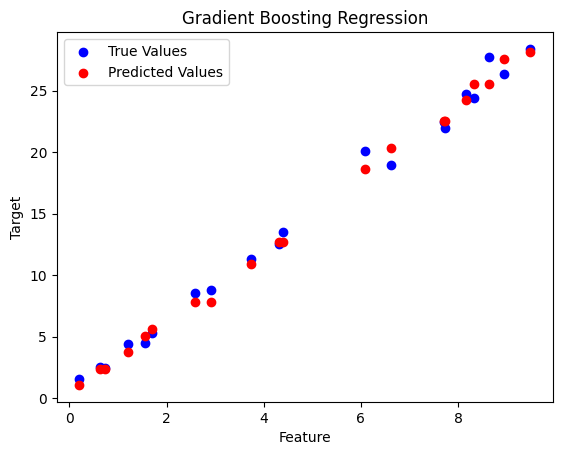

In [6]:
# Step 6: Visualize the Results (Optional, for better understanding):

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='True Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.legend()
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Gradient Boosting Regression")
plt.show()


Example Output:

Mean Squared Error (MSE): Lower is better.

R-squared (R²): Value close to 1 indicates good performance.

This implementation uses decision trees from sklearn.tree.DecisionTreeRegressor for simplicity. It trains the model iteratively, correcting errors in each step, and evaluates its performance on the test set. The visualization compares the true values with predictions.

Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters.

Answer:

To optimize your model's performance by experimenting with different hyperparameters like learning rate, number of trees, and tree depth, you can use Grid Search or Random Search. Here's how to approach it:

1. Define the model
Choose a model you are working with (e.g., Gradient Boosting, Random Forest, XGBoost, etc.).

2. Select the hyperparameters to tune
Typical hyperparameters include:

Learning rate: Controls the step size for updating weights (e.g., 0.001, 0.01, 0.1).

Number of trees: The total number of decision trees (e.g., 50, 100, 200).
Tree depth: Maximum depth of each tree (e.g., 3, 5, 10).

3. Grid Search vs. Random Search

Grid Search

Exhaustively searches over a predefined grid of hyperparameter values.

Random Search

Samples a random combination of hyperparameters within specified ranges.

4. Implementing Grid/Random Search
Here’s an example using scikit-learn:

In [8]:
# Grid Search

from sklearn.ensemble import GradientBoostingRegressor # Change to Regressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = GradientBoostingRegressor() # Change to Regressor

# Define the hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) # Update scoring for regression
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [9]:
#Random Search

from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters distribution
param_dist = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 10]
}

# Set up Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", random_search.best_params_)


Best parameters: {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [11]:
# Evaluate the Optimized Model
# After finding the best hyperparameters, re-train the model with those values
# and evaluate its performance:
best_model = grid_search.best_estimator_  # or random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on test data
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.990955065304111


Use cross-validation (cv) to ensure robust performance estimation.

If the dataset is large, consider using Random Search for faster results.
Visualize results to understand the impact of hyperparameters.

Q4. What is a weak learner in Gradient Boosting?

Answer:

A weak learner in the context of Gradient Boosting is a predictive model that performs slightly better than random guessing. In more formal terms, it has a small edge over random chance in terms of predictive accuracy.

Key Characteristics of a Weak Learner:
Low Complexity: Weak learners are often simple models, such as decision stumps (trees with one split) or shallow trees.
Slight Predictive Power: They are not strong models individually but can capture basic patterns in the data.
High Bias: Weak learners tend to underfit the data because they are intentionally kept simple to avoid overfitting.
Role in Gradient Boosting:
In Gradient Boosting, multiple weak learners are sequentially trained, where each learner attempts to correct the errors (or residuals) made by the previous ones. The iterative process combines these weak learners to create a strong ensemble model with reduced bias and variance.

Why Use Weak Learners?
Control Overfitting: Weak learners focus on simple relationships in the data, helping avoid overfitting.
Flexibility: Their simplicity makes them easy to optimize and combine during the boosting process.
Iterative Improvement: Even weak models can add significant value when aggregated intelligently.
The strength of Gradient Boosting lies in how these weak learners are combined into a strong predictive model through the boosting process.


Q5. What is the intuition behind the Gradient Boosting algorithm?

Answer:

The intuition behind the Gradient Boosting algorithm lies in sequentially improving a model by correcting its errors in an iterative fashion. Here’s a step-by-step explanation of the intuition:

1. Start with a Weak Model:
Begin with a simple predictive model (e.g., a decision tree stump).
This weak model makes predictions but likely has errors (residuals).
2. Focus on the Mistakes:
Analyze where the current model is performing poorly by calculating the residuals, which are the differences between the true values and the predicted values.
These residuals represent the gradient of the loss function with respect to the predictions.
3. Fit a New Model to Correct Residuals:
Train a new weak learner to predict the residuals (errors).
Intuition: The new model aims to “adjust” the original predictions by focusing on fixing what was missed.
4. Update Predictions:
Combine the predictions of the current ensemble of models by adding the predictions from the new model, scaled by a learning rate (to control how much each model contributes).
5. Repeat the Process:
Iteratively add more weak learners, each trained to correct the residual errors from the combined predictions of all previous models.
Over time, the ensemble becomes a strong model that captures complex patterns in the data.
6. Stop When Errors Are Minimized:
Continue the process until the model achieves a desired level of performance (e.g., minimized loss or convergence) or reaches a specified number of iterations.

Why Does Gradient Boosting Work?

Boosting = Learning from Mistakes: Each step improves the model by addressing its prior shortcomings.
Gradient Descent Perspective: Gradient Boosting is essentially performing gradient descent in function space, minimizing the loss function by updating the model iteratively.
Ensemble Power: Combining multiple weak learners results in a strong, accurate model.

Real-World Analogy:

Imagine a teacher helping a student learn math. The student starts with a basic understanding and makes mistakes. The teacher provides targeted corrections (feedback on errors). Over time, the student builds a strong understanding by systematically addressing their mistakes.

This is analogous to how Gradient Boosting improves a model step-by-step!

Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

Answer:

Gradient Boosting builds an ensemble of weak learners sequentially, where each learner focuses on correcting the errors made by the previous ones. Here’s a breakdown of the process:

Step-by-Step Explanation:
1. Initialize the Model:
Start with a simple initial prediction, often the mean of the target variable for regression or the log-odds for classification.
This forms the baseline prediction for the first iteration.
2. Compute Residuals (Errors):
For each data point, calculate the residuals (differences) between the true target values and the predictions made by the current model.
These residuals represent the parts of the data the model has not yet learned.
3. Fit a Weak Learner:
Train a new weak learner (e.g., a shallow decision tree) to predict the residuals.
This weak learner focuses on capturing the patterns in the data that were missed by the current ensemble.
4. Update the Ensemble:
Add the predictions of the new weak learner to the ensemble’s predictions. The contribution of this learner is scaled by a learning rate (a small constant) to control its influence.
Updated prediction:
𝐹
𝑚
(
𝑥
)
=
𝐹
𝑚
−
1
(
𝑥
)
+
𝜂
⋅
ℎ
𝑚
(
𝑥
)
F
m
​
 (x)=F
m−1
​
 (x)+η⋅h
m
​
 (x)
𝐹
𝑚
−
1
(
𝑥
)
F
m−1
​
 (x): Predictions from the previous ensemble.
ℎ
𝑚
(
𝑥
)
h
m
​
 (x): New weak learner's predictions (trained on residuals).
𝜂
η: Learning rate (typically a small value like 0.1).
5. Repeat the Process:
Iterate the process, fitting successive weak learners to the residuals of the current ensemble and updating the predictions.
Over time, the residuals shrink as the model gets better at capturing the patterns in the data.
6. Stop When a Stopping Criterion is Met:
The process stops when:
A specified number of weak learners is reached.
The residual errors are sufficiently small (convergence).
Additional iterations do not significantly improve the model (early stopping).
How the Ensemble is Built:
Each weak learner contributes a small piece to the overall prediction.
By combining many simple learners, the ensemble captures complex patterns in the data.
Key Components in Building the Ensemble:
Weak Learners: Simple models like decision stumps or shallow trees.
Sequential Addition: Learners are added one at a time, focusing on correcting previous errors.
Learning Rate (η): Controls the contribution of each weak learner, preventing overfitting.
Loss Function: Guides the optimization by measuring the error to minimize (e.g., Mean Squared Error for regression, Log Loss for classification).
Intuition:
Think of Gradient Boosting as solving a puzzle. Each weak learner (small puzzle piece) addresses a specific gap left by the previous ones. Over time, the ensemble fills in the gaps, resulting in a strong predictive model.

Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

Answer:

Constructing the mathematical intuition of the Gradient Boosting algorithm involves understanding how the model iteratively minimizes a loss function in a functional space. Here's a step-by-step outline of the process:

1. Define the Problem and Objective:
Start with a supervised learning problem where you have:
Features
𝑋
=
{
𝑥
1
,
𝑥
2
,
…
,
𝑥
𝑛
}
X={x
1
​
 ,x
2
​
 ,…,x
n
​
 },
Target values
𝑌
=
{
𝑦
1
,
𝑦
2
,
…
,
𝑦
𝑛
}
Y={y
1
​
 ,y
2
​
 ,…,y
n
​
 },
A model
𝐹
(
𝑥
)
F(x) that predicts
𝑦
^
=
𝐹
(
𝑥
)
y
^
​
 =F(x).
Choose a loss function
𝐿
(
𝑦
,
𝐹
(
𝑥
)
)
L(y,F(x)) that measures the error between predictions and true values.
For regression: Mean Squared Error (MSE).
For classification: Log Loss (or other suitable functions).
2. Initialize the Model:
Begin with a simple constant prediction,
𝐹
0
(
𝑥
)
F
0
​
 (x), to minimize the loss function:
𝐹
0
(
𝑥
)
=
arg
⁡
min
⁡
𝑐
∑
𝑖
=
1
𝑛
𝐿
(
𝑦
𝑖
,
𝑐
)
F
0
​
 (x)=arg
c
min
​
  
i=1
∑
n
​
 L(y
i
​
 ,c)
For example:
Regression:
𝐹
0
(
𝑥
)
=
mean
(
𝑦
)
F
0
​
 (x)=mean(y),
Classification:
𝐹
0
(
𝑥
)
=
log-odds
F
0
​
 (x)=log-odds.
3. Iterative Process:
At each iteration
𝑚
m:

(a) Compute Residuals (Pseudo-Residuals):
The residuals represent the negative gradient of the loss function with respect to the predictions
𝐹
𝑚
−
1
(
𝑥
)
F
m−1
​
 (x):
𝑟
𝑖
(
𝑚
)
=
−
∂
𝐿
(
𝑦
𝑖
,
𝐹
𝑚
−
1
(
𝑥
𝑖
)
)
∂
𝐹
𝑚
−
1
(
𝑥
𝑖
)
r
i
(m)
​
 =−
∂F
m−1
​
 (x
i
​
 )
∂L(y
i
​
 ,F
m−1
​
 (x
i
​
 ))
​

Intuition: Residuals indicate how the model needs to adjust its predictions to minimize the loss.
(b) Fit a Weak Learner:
Train a weak learner
ℎ
𝑚
(
𝑥
)
h
m
​
 (x) (e.g., a shallow decision tree) to predict the residuals
𝑟
𝑖
(
𝑚
)
r
i
(m)
​
 .
This step aligns the weak learner with the direction of steepest descent in the loss function.
(c) Update the Model:
Add the new weak learner's predictions to the current model:
𝐹
𝑚
(
𝑥
)
=
𝐹
𝑚
−
1
(
𝑥
)
+
𝜂
⋅
ℎ
𝑚
(
𝑥
)
F
m
​
 (x)=F
m−1
​
 (x)+η⋅h
m
​
 (x)
𝜂
η: Learning rate (a small constant like 0.1 or 0.01) that controls the contribution of each weak learner.
4. Minimize the Loss Function Locally:
Instead of directly minimizing the global loss function, Gradient Boosting minimizes it iteratively by solving:
ℎ
𝑚
(
𝑥
)
=
arg
⁡
min
⁡
ℎ
∑
𝑖
=
1
𝑛
𝐿
(
𝑦
𝑖
,
𝐹
𝑚
−
1
(
𝑥
𝑖
)
+
𝜂
⋅
ℎ
(
𝑥
𝑖
)
)
h
m
​
 (x)=arg
h
min
​
  
i=1
∑
n
​
 L(y
i
​
 ,F
m−1
​
 (x
i
​
 )+η⋅h(x
i
​
 ))
This ensures that each weak learner incrementally improves the model.
5. Repeat Until Stopping Criterion:
Continue the process until:
A fixed number of iterations
𝑀
M is reached.
The residuals or overall loss converge.
Additional learners do not significantly improve the model.
Mathematical Optimization Perspective:
Gradient Boosting can be viewed as gradient descent in functional space:
Instead of optimizing parameters, it optimizes functions (weak learners).
The gradient of the loss function is used to guide each step in building the model.
6. Final Prediction:
After
𝑀
M iterations, the final model is:
𝐹
𝑀
(
𝑥
)
=
𝐹
0
(
𝑥
)
+
𝜂
∑
𝑚
=
1
𝑀
ℎ
𝑚
(
𝑥
)
F
M
​
 (x)=F
0
​
 (x)+η
m=1
∑
M
​
 h
m
​
 (x)
Key Intuitions Behind the Math:
Gradient Descent Analogy: At each step, the model moves in the direction of the gradient to reduce the loss.
Residual Correction: Each weak learner is trained to address the errors (residuals) of the current model.
Function Approximation: The ensemble of weak learners collectively approximates the true function
𝐹
(
𝑥
)
F(x) that maps features to targets.
By iteratively minimizing the loss in this manner, Gradient Boosting constructs a strong predictive model from a series of weak learners.

**Thank You!**